# Google Brain - Ventilator Pressure Prediction

In [3]:
# Installing the modules

!pip3 install kaggle
!pip3 install catboost

     |████████████████████████████████| 76.4 MB 24 kB/s 


In [4]:

# Required modules

import numpy as np
import pandas as pd
import seaborn as sns

from zipfile import ZipFile
from google.colab import files
from matplotlib import pyplot as plt

from catboost import CatBoostRegressor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

In [5]:
# Config

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 12)

In [6]:
# Upload the creds

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anurag1817","key":"fee9a6f9d27c73cdef9835b97335e533"}'}

In [7]:
# Create kaggle folder

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
# Test the command

!kaggle competitions download -c ventilator-pressure-prediction

 97% 73.0M/75.4M [00:02<00:00, 33.9MB/s]
100% 75.4M/75.4M [00:02<00:00, 32.0MB/s]
 12% 1.00M/8.50M [00:00<00:01, 5.68MB/s]
100% 8.50M/8.50M [00:00<00:00, 28.3MB/s]
 93% 129M/139M [00:03<00:00, 41.5MB/s]
100% 139M/139M [00:03<00:00, 37.9MB/s]


In [9]:
# Opening the zipfile

with ZipFile('train.csv.zip', 'r') as zf:
    zf.extractall('./')

with ZipFile('test.csv.zip', 'r') as zf:
    zf.extractall('./')

with ZipFile('sample_submission.csv.zip', 'r') as zf:
    zf.extractall('./')

In [10]:
# Load the train data

train = pd.read_csv('train.csv', index_col=['id'])
train.head()

/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


breath_id   R   C  time_step       u_in  u_out   pressure
id                                                           
1           1  20  50   0.000000   0.083334      0   5.837492
2           1  20  50   0.033652  18.383041      0   5.907794
3           1  20  50   0.067514  22.509278      0   7.876254
4           1  20  50   0.101542  22.808822      0  11.742872
5           1  20  50   0.135756  25.355850      0  12.234987

In [11]:
# Inspecting the train data

train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6036000 entries, 1 to 6036000
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   breath_id  int64  
 1   R          int64  
 2   C          int64  
 3   time_step  float64
 4   u_in       float64
 5   u_out      int64  
 6   pressure   float64
dtypes: float64(3), int64(4)
memory usage: 368.4 MB


breath_id             R  ...         u_out      pressure
count  6.036000e+06  6.036000e+06  ...  6.036000e+06  6.036000e+06
mean   6.283886e+04  2.703618e+01  ...  6.204493e-01  1.122041e+01
std    3.633526e+04  1.959549e+01  ...  4.852752e-01  8.109703e+00
min    1.000000e+00  5.000000e+00  ...  0.000000e+00 -1.895744e+00
25%    3.137700e+04  5.000000e+00  ...  0.000000e+00  6.329607e+00
50%    6.276550e+04  2.000000e+01  ...  1.000000e+00  7.032628e+00
75%    9.430100e+04  5.000000e+01  ...  1.000000e+00  1.364103e+01
max    1.257490e+05  5.000000e+01  ...  1.000000e+00  6.482099e+01

[8 rows x 7 columns]

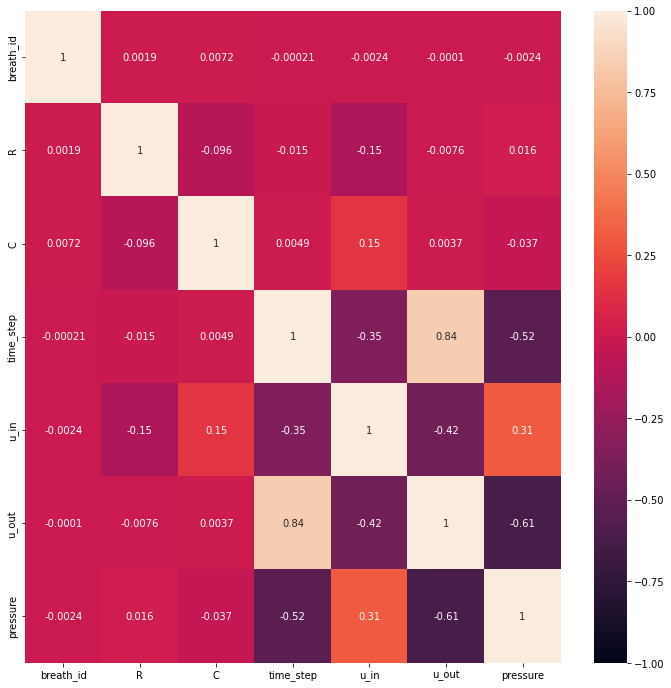

In [12]:
# Correlation matrix

sns.heatmap(train.corr(), annot=True, vmin=-1, vmax=1)

In [13]:
# Missing values

if train.isna().any().any():
    print(train.isna().sum()/train.shape[0])
else:
    print("No Mising values")

No Mising values


In [14]:
# Seperating out features and labels

X = train.drop(['pressure', 'breath_id'], axis=1)
y = train['pressure']

In [15]:
# Train and Test split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

In [17]:
# Fit a CatBoost

model = CatBoostRegressor(verbose=2)
model.fit(X_train, y_train)

Learning rate set to 0.156396
0:	learn: 7.3709611	total: 719ms	remaining: 11m 58s
2:	learn: 6.3050317	total: 1.83s	remaining: 10m 9s
4:	learn: 5.6275533	total: 2.97s	remaining: 9m 51s
6:	learn: 5.2111147	total: 4.11s	remaining: 9m 42s
8:	learn: 4.9404116	total: 5.24s	remaining: 9m 37s
10:	learn: 4.7645817	total: 6.38s	remaining: 9m 34s
12:	learn: 4.6581822	total: 7.51s	remaining: 9m 30s
14:	learn: 4.5798726	total: 8.65s	remaining: 9m 28s
16:	learn: 4.5155616	total: 9.81s	remaining: 9m 27s
18:	learn: 4.4731130	total: 10.9s	remaining: 9m 23s
20:	learn: 4.4366001	total: 12s	remaining: 9m 19s
22:	learn: 4.4051943	total: 13.1s	remaining: 9m 17s
24:	learn: 4.3822302	total: 14.2s	remaining: 9m 14s
26:	learn: 4.3631352	total: 15.3s	remaining: 9m 11s
28:	learn: 4.3453024	total: 16.4s	remaining: 9m 8s
30:	learn: 4.3311816	total: 17.5s	remaining: 9m 7s
32:	learn: 4.3184940	total: 18.6s	remaining: 9m 4s
34:	learn: 4.3059224	total: 19.7s	remaining: 9m 3s
36:	learn: 4.2978477	total: 20.8s	remaining:

In [18]:
# Evaluting the model(on train)

model.score(X_train, y_train)

0.765647375181861

In [19]:
# Evaluting the model(on valid)

model.score(X_valid, y_valid)

0.7653265439790684

In [20]:
# Loading the test set

test = pd.read_csv('test.csv', index_col=['id'])
test.head()

/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


breath_id  R   C  time_step       u_in  u_out
id                                               
1           0  5  20   0.000000   0.000000      0
2           0  5  20   0.031904   7.515046      0
3           0  5  20   0.063827  14.651675      0
4           0  5  20   0.095751  21.230610      0
5           0  5  20   0.127644  26.320956      0

In [21]:
# Prediction on test set

test_pred = model.predict(test.drop('breath_id', axis=1))

In [22]:
# Submission

submission = pd.read_csv('sample_submission.csv')
submission['pressure'] = test_pred
submission.to_csv('output.csv', index=False)

In [23]:
# Kaggle Submission

!kaggle competitions submit -c ventilator-pressure-prediction -f output.csv -m "CatBoost without breath id"

100% 99.6M/99.6M [00:05<00:00, 18.7MB/s]
Successfully submitted to Google Brain - Ventilator Pressure Prediction